In [1]:
%pip install GPy

  Using cached GPy-1.10.0.tar.gz (959 kB)
  Preparing metadata (setup.py) ... done
  Using cached paramz-0.9.5.tar.gz (71 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.4 MB/s eta 0:00:0000:0100:01
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=1560608 sha256=eb50f46cdf99585f10b6489743cf42d49f604bea7886a131250dcf038c5da49c
  Stored in directory: /home/gautam.pv/.cache/pip/wheels/1c/13/d2/18ba56e6f6bf00c6f1562724da66f84537d17febb0415c4aa7
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102549 sha256=d8d940bd9c226b1c465ec41fd8da3008be60445f4f2d47a51726ae034a3f2ca7
  Stored in directory: /home/gautam.pv/.cache/pip/wheels/a4/e7/da/52596690bfd1d424fdd41bde0e13cd9d35a816314bb3f00a6e
Successfully built GPy paramz
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Create a simple 1 d dataset for Gaussian process regression
import numpy as np
import matplotlib.pyplot as plt
import GPy
import os
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import GPy


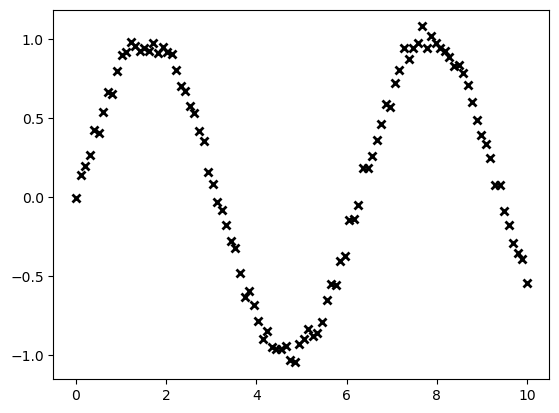

In [3]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.randn(100) * 0.05
plt.plot(x, y, 'kx', mew=2)
plt.show()

In [4]:
m = GPy.models.GPRegression(x[:, None], y[:, None], GPy.kern.RBF(1))

In [5]:
m.optimize_restarts(10)

Optimization restart 1/10, f = -144.6976284326717
Optimization restart 2/10, f = -144.69762843264866
Optimization restart 3/10, f = -144.69762843268427
Optimization restart 4/10, f = -144.69762842817008
Optimization restart 5/10, f = -144.69762843264434
Optimization restart 6/10, f = -144.697628432666
Optimization restart 7/10, f = -144.69762843266545
Optimization restart 8/10, f = -144.6976284317747
Optimization restart 9/10, f = -144.6976284325037
Optimization restart 10/10, f = -144.697628432648


In [6]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.9123949321773477,+ve,
rbf.lengthscale,2.2741875319825784,+ve,
Gaussian_noise.variance,0.0017562344648439526,+ve,


In [7]:
# Get the loss for variance = 1 and lengthscale = 1
m.log_likelihood()


144.69762843268427

In [8]:
m.variance = 1
m.lengthscale = 1
m.log_likelihood()

144.69762843268427

In [1]:
# do the same thing in GPyTorch
import torch
import gpytorch
from matplotlib import pyplot as plt
from gpytorch.kernels import ScaleKernel, RBFKernel
from gpytorch.means import ConstantMean
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.distributions import MultivariateNormal
from gpytorch.models import ExactGP
from gpytorch.priors import GammaPrior, NormalPrior
from gpytorch.constraints import GreaterThan
from gpytorch.kernels import Kernel
from gpytorch.kernels import RBFKernel, ScaleKernel

ImportError: /home/gautam.pv/miniconda3/envs/akc_env_kkd/lib/python3.10/site-packages/torch/lib/libtorch_cuda_cpp.so: undefined symbol: cudaGraphRetainUserObject, version libcudart.so.11.0

In [ ]:
# create the model in gpytorch
class ExactGPModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean()
        self.covar_module = ScaleKernel(RBFKernel(scale=1.0, lengthscale=1.0))

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return MultivariateNormal(mean_x, covar_x)

# train the model
# initialize the model
# initialize the likelihood
likelihood = GaussianLikelihood()
model = ExactGPModel(torch.from_numpy(x).float().unsqueeze(-1), torch.from_numpy(y).float().unsqueeze(-1), likelihood)
num_epochs = 100
training_iter = 100
# Find optimal model hyperparameters
# Use the adam optimizer
# "Loss" for GPs - the marginal log likelihood
# Defines the model and likelihood
model.train()
likelihood.train()
for epoch in range(num_epochs):
    # Within each iteration, we will go over each minibatch of data
    for i in range(training_iter):
        # Zero backpropped gradients from previous iteration
        optimizer.zero_grad()
        # Get predictive output
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        print('Iter %d/%d - Loss: %.3f' % (i + 1, training_iter, loss.item()))
        optimizer.step() 
# get the likelihood
likelihood.eval()
model.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(0, 10, 100)
    observed_pred = likelihood(model(test_x))
    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(train_x.numpy(), train_y.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

In [ ]:
# use lbfgs to train a GP Regression model using GPYtorch
# initialize the model
# initialize the likelihood
likelihood = GaussianLikelihood()
model = ExactGPModel(torch.from_numpy(x).float().unsqueeze(-1), torch.from_numpy(y).float().unsqueeze(-1), likelihood)
# Find optimal model hyperparameters
# Use the adam optimizer
# "Loss" for GPs - the marginal log likelihood
# Defines the model and likelihood
model.train()
likelihood.train()
# Use the LBFGS optimizer
optimizer = torch.optim.LBFGS(model.parameters(), lr=0.1)
# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
# Define training iterations
training_iter = 100
for i in range(training_iter):
    # Zero backpropped gradients from previous iteration
    def closure():
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        return loss
    loss = optimizer.step(closure)
    print('Iter %d/%d - Loss: %.3f' % (i + 1, training_iter, loss.item()))